## Assignment Goals

Your student ID:: 190042122

The goal of this assignment is to familiarize yourself with:

1. Parsing HTML data
2. Text classification using supervised machine learning algorithms
3. Tools for sentiment analysis

The assignment combines tutorial components, with learning exercises that you must complete and submit. The learning exercise sections are clearly demarcated within the assignments.


**Necessary Functions for the Assignment**

In [2]:
import requests
import nltk
from nltk.util import ngrams
import requests
import time
import json
import math
from pprint import pprint


# Counts the frequency of token occurences in some text
def CountFrequency(my_list):

    # Creating an empty dictionary
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq


# An ngram extractor

def extract_word_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]



<hr>

# Part 0: Collecting Data


We will continue our journey through the text of the philosophers. More specifically, we'll be exploring how to use a natural language data for classification problems. To begin, let's return back to [Project Gutenburg](https://www.gutenberg.org/) and notice that the website not only provides us with access to the text of Bertrand's Russel's The Problem's of Philosophy, but also provides us with some interesting meta-data in the `Bibliographic Record` section.





Notice that the Bibliographic record provided by Project Gutenberg provides **classifications** of the books according their Library of Congress Class (`LOC Class`), as well as a `Subject`. Classifications are useful because they take our messy, continuous world and break it into manageable groupings that we can more easily act upon. Thanks to Project Gutenburg's classification, we can see that `The Problems of Philosophy` is a book about `Philosophy` (who would have guessed?!) and by knowing this classification we may (and most likely will) make some simplifying assumptions about the book without reading even a single line of it.

It would be useful if we could collect this Bibliographic record, in addition to the information in the raw text itself. But in order for us to extract that information, we'll first need to obtain some practice processing, and extracting information from, HTML documents. If this is your first time looking at HTML documents and you would like to review how they are formatted, you can use [W3 Schools](https://www.w3schools.com/html/default.asp).

### Collecting and processing HTML data
Let's start by looking through some simple HTML documents for a mythical social network that I've stored locally in this respository (`https://drive.google.com/drive/folders/1eUhKt26frIOQNiqXN9sxv68I9ZbA2Tge?usp=sharing`): [Anqa.html](https://drive.google.com/file/d/1Y08j9tqBoOTlPaAlIoyBJH33O77Fwq4r/view?usp=sharing), [Garuda.html](https://drive.google.com/file/d/1j18AuDUbhb9azL83g9CWuDxaBfbSP-sQ/view?usp=drive_link), [Konrul.html](https://drive.google.com/file/d/1E1nhxyCV6MUCpD8xe03AsvA_JPMpwpGB/view?usp=drive_link), [Nue.html](https://drive.google.com/file/d/1IGxkLbrzzhIbsxuWs7PVK9le-Ukk-6gI/view?usp=drive_link) and [Simargl.html](https://drive.google.com/file/d/1TN0Cn-OMbfZyurytUF3WLCa7YCD5Wq91/view?usp=drive_link). You will notice that each HTML file simply contains a list of friends and enemies with links to other webpages.

To help us obtain some familiarity with parsing these types of documents, let's see if we can write some code to rank order these five mysterious figures based on the number of friends and enemies that they have mentioned in their web pages. To be able to work with files, please download the html files first in your machine. Then create a folder called 'html' in the python environment you are working in and upload the html files in that folder. The first step in that process will be to read the HTML pages into Python:

In [3]:
# A set of local HTML files
html_files = ['Anqa.html','Garuda.html','Konrul.html','Nue.html','Simargl.html']

# Read each file into a dictionary of HTML files
html = {}
for file in html_files:
    f = open('/kaggle/input/html-files-nlp/' + file, 'r');
    html[file] = content = f.read();
    f.close()

<br><br>We now have a dictionary containing each of the HTML files. Here's Anqa.html:

In [4]:
print('\n')
print(html['Anqa.html'])
print('\n')



<html>
<head><title>Anqa's Page</title></head>
<body>

<p class="friend"> My friends are:
<a href="/lab/tree/materials/html/Konrul.html" class="best"  id="link1">Konrul</a> and
</p>
    
<p class="enemy"> My enemies are:
<a href="/lab/tree/materials/html/Nue.html"  class="worst" id="link1">Nue</a>.
</p>

</body>
</html>




<br> The trick to extracting information from HTML documents is to look for a unified structure across documents that your parser can take advantage of. If we inspect the raw HTML of all five documents, we'll notice that they each contain a `<p class="friend">...</p>` and a `<p class="enemy">...</p>` section and that within those sections there are multiple `<a>` tags that list out the names, and links to the pages of, friends and enemies. To extract this information we can use some carefully crafted Regular Expressions!

In [5]:
import re
from pprint import pprint

# Function to extract the friendship data from an HTML page
def extractFriendData(html):
    _data = {}

    # Extract the friend and the enemy paragraphs:
    p_friend = re.findall(r'<p[^>]*class="friend"[^>]*>.*?</p>', html, re.DOTALL)[0]
    p_enemy  = re.findall(r'<p[^>]*class="enemy"[^>]*>.*?</p>' , html, re.DOTALL)[0]

    # Within each paragraph, find the href
    _data['friends'] = re.findall(r'>(Nue|Konrul|Garuda|Simargl|Anqa)<', p_friend, re.DOTALL)
    _data['enemies'] = re.findall(r'>(Nue|Konrul|Garuda|Simargl|Anqa)<', p_enemy, re.DOTALL)

    return _data

# Run the function for each page, and store results in a dictionary
data = {}
for page in html.keys():
    data[page.split('.')[0]] = extractFriendData(html[page])

print('\n')
pprint(data)
print('\n')



{'Anqa': {'enemies': ['Nue'], 'friends': ['Konrul']},
 'Garuda': {'enemies': ['Konrul'], 'friends': ['Anqa', 'Konrul']},
 'Konrul': {'enemies': ['Anqa'], 'friends': ['Nue']},
 'Nue': {'enemies': [], 'friends': ['Simargl', 'Nue']},
 'Simargl': {'enemies': ['Nue'], 'friends': []}}




<br>Using the code block above, we are able to extract the structured data from the set of HTML documents. From here, it won't take much work to understand who has the most friends, and who has the most enemies in our mythical social network:


In [6]:
friends, enemies = [], []
for page in data:
    friends += data[page]['friends']
    enemies += data[page]['enemies']

print('Friendship counts:'); pprint(CountFrequency(friends)); print('\n')
print('Enemy counts:'); pprint(CountFrequency(enemies)); print('\n')

Friendship counts:
{'Anqa': 1, 'Konrul': 2, 'Nue': 2, 'Simargl': 1}


Enemy counts:
{'Anqa': 1, 'Konrul': 1, 'Nue': 2}




# Text classification using supervised machine learning algorithms

<br> In this part of the assignment, we will import 4 books: 2 of Bertrand Russel and 2 of Friedrich Nietzsche. The books are available in this link: (`https://drive.google.com/drive/folders/1fMLxidEOXiaSCTU7fAAdzj3rvyNfe7Tv?usp=sharing`). Please download all these 4 books and upload it in your environment creating a folder named 'books_json'.

<br><br> Let's take a peak at the data in `Beyond_Good_and_Evil.json`:

In [7]:
import json
# Open the book
with open('/kaggle/input/books-json/Beyond_Good_and_Evil.json',encoding='utf-8') as f:
    book = json.loads(f.read())

print('------------------------------------------------------------')
print('Subject   - '   + ''.join(book['Title'])  +
      '\nBy        - ' + ''.join(book['Author']) +
      '\nLoC Class - ' + ';'.join(book['LoC Class']))
print('------------------------------------------------------------')
print('**Sample Text**:' + book['text'][11012:11508] + '...')

------------------------------------------------------------
Subject   - Beyond Good and Evil
By        - Nietzsche, Friedrich Wilhelm, 1844-1900
LoC Class - B: Philosophy, Psychology, Religion
------------------------------------------------------------
**Sample Text**:r part of the
conscious thinking of a philosopher is secretly influenced by his
instincts, and forced into definite channels. And behind all logic and
its seeming sovereignty of movement, there are valuations, or to speak
more plainly, physiological demands, for the maintenance of a definite
mode of life For example, that the certain is worth more than the
uncertain, that illusion is less valuable than "truth" such valuations,
in spite of their regulative importance for US, might notw...


<br><br> Now let's separate the data by author into two corpora, one for `Nietzsche` and one for `Russel` and perform some basic cleaning on the text by removing non-ascii characters, and converting everything to lowercase.

In [8]:
import re
from os import listdir
import json
# -----------------------------------------------
# Import the books
# -----------------------------------------------
books = listdir('/kaggle/input/books-json/')
files = ['/kaggle/input/books-json/' + book for book in books if book[0] != '.']

data = []
for file in files:
    with open(file) as f:
        x = json.load(f)
        data.append(x)
# -----------------------------------------------
# Merge the text from Nietzsche and Russel into two corpora
# -----------------------------------------------
Nietzsche, Russel = '', ''
for item in data:
    if 'Nietzsche' in item['Author'][0]:
        Nietzsche  += item['text'].replace(u'\xa0', u' ').replace(u'\ufeff', u' ').replace('_', ' ') + ' '
    if 'Russel'    in item['Author'][0]:
        Russel     += item['text'].replace(u'\xa0', u' ').replace(u'\ufeff', u' ').replace('_', ' ') + ' '

# -----------------------------------------------
# Keeping only the ascii charaacters
# -----------------------------------------------
Nietzsche = re.sub(r'[^\x00-\x7F]+','', Nietzsche)
Russel    = re.sub(r'[^\x00-\x7F]+','', Russel)

# -----------------------------------------------
# Converting all words to lower case
# -----------------------------------------------
Nietzsche  = Nietzsche.lower()
Russel     = Russel.lower()

# print(Nietzsche)

<hr>

# Part 1: Classification using Classification Models
Language models can be used for classification purposes by comparing the probability that a given sequence of text was generated by one author, versus another. But if our objective is to classify the author of a text, we need not spend so much time building a language model; instead we can focus our attention on the classification task directly.

Let's return to the earlier task of sentence classification, starting with breaking our corpora into sentences.

In [9]:
import nltk
nltk.download('punkt')

r_sentences = nltk.sent_tokenize(Russel)
n_sentences = nltk.sent_tokenize(Nietzsche)

print('Sentences in Nietzsche Books: ', len(n_sentences))
print('Sentences in Russel Books:    ', len(r_sentences))

print('------------------------------------------')
print('Here is an example sentence from Russel:')
print('------------------------------------------')
print(r_sentences[152])

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Sentences in Nietzsche Books:  3099
Sentences in Russel Books:     3113
------------------------------------------
Here is an example sentence from Russel:
------------------------------------------
in this there is no opposition to instinct as a
whole, but only to blind reliance upon some one interesting aspect of
instinct to the exclusion of other more commonplace but not less
trustworthy aspects.


### Bag of Words
As we discussed in the lectures, a bag-of-words is a simple way of representing a text document or segment as the count of the n-grams within it. With that in mind, let's convert the example sentence above into a bag-of-words representation:

In [10]:
unigram     = extract_word_ngrams(r_sentences[152],1)
bag_of_word = CountFrequency(unigram)

pprint(bag_of_word)

{',': 1,
 '.': 1,
 'a': 1,
 'as': 1,
 'aspect': 1,
 'aspects': 1,
 'blind': 1,
 'but': 2,
 'commonplace': 1,
 'exclusion': 1,
 'in': 1,
 'instinct': 2,
 'interesting': 1,
 'is': 1,
 'less': 1,
 'more': 1,
 'no': 1,
 'not': 1,
 'of': 2,
 'one': 1,
 'only': 1,
 'opposition': 1,
 'other': 1,
 'reliance': 1,
 'some': 1,
 'the': 1,
 'there': 1,
 'this': 1,
 'to': 3,
 'trustworthy': 1,
 'upon': 1,
 'whole': 1}


<br><br> Notice that converting a sentence to its bag-of-words representation eliminates information about the order of the words! That is, if I simply provided you this bag of words, you would have no way of (consistently) reconstructing the original sentence that was used to generate it. So why would anyone use a bag-of-words representation? Because it provides a simple way to convert our sentences into numerical vectors, for instance:

In [11]:
vector = list(bag_of_word.values())
print(vector)

[1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


<br><br>Once we have transformed a string into a numerical vector, we can treat language like we would any other numerical object! That is, having all of our sentences represented as points in a vector space will allow us to do things like train models that can classify the authors of documents!

But before we dive into classification using these vectors, we'll need to address a deficiency of the bag of words representation shown in the above example. Consider the fact that any given sentence is likely to only contain a small number of the total words in a given vocabulary. Consequently, if we want to compare two vectors, we'll need to keep track of both the words from the vocabulary that showed up, as well as those that did not! Here's how:

In [12]:
# Get all the distinct unigrams from the Russel books and the Nietzsche books and combine them
vocabulary    = list(set( extract_word_ngrams(Russel, 1) + extract_word_ngrams(Nietzsche, 1) ))

# Get the sentence I want to cast as bag of words:
unigram = extract_word_ngrams(r_sentences[152],1)

# Convert to bag of words:
tainted_bow  = CountFrequency(unigram + vocabulary)         # append the vocabulary to make sure it's counted
bag_of_words = {k: v - 1 for k, v in tainted_bow.items()}         # remove the counts that came from the vocabulary
vector       = list(bag_of_words.values())                        # cast to a vector

In [13]:
print('Bag of Words representation (showing first 50 entries, only):')
print(vector[0:50])

Bag of Words representation (showing first 50 entries, only):
[1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<br><br>The above code is not the most computationally efficient way to create the bag of words representation, but it's useful to help you understand exactly what a bag-of-words representation is capturing, and how it is generated. In reality, we would want to store our bag of words representation of the text in a sparse array instead of a memory-inefficient dictionary or list. Fortunately, there are Python packages that take care of creating bag-of-words representations in only a few lines of code. Let's use the [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) function within Python's [Sklearn Library](https://scikit-learn.org/stable/) to convert the sentences we extracted earlier into their bag-of-words represenations:

In [14]:
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

# Generate an array that casts the language to a bag of words representation:
vectorizer = CountVectorizer()
X          = vectorizer.fit_transform(r_sentences + n_sentences)
X          = X.toarray()


print('Bag of words representation for', len(r_sentences), 'Russel sentences and', len(n_sentences), 'Nietzsche sentences')
print('Yields a array, X of size:',np.size(X,0), 'sentences x', np.size(X,1), 'tokens')
print(X)

Bag of words representation for 3113 Russel sentences and 3099 Nietzsche sentences
Yields a array, X of size: 6212 sentences x 12937 tokens
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<br><br>Note that the `CountVectorizer` object operates on the sentences themselves, performs the tokenization, and can even compute the representation for various n-gram sizes by setting `ngram_range` value of the function.

Now that we have a numerical representation of our text, we can start training machine learning algorithms with it. Recall from the lecture that supervised classification methods help our models learn a mathematical transformation of some given data, such as the words in a sentence, into some other data that we would like to make predictions about, such as the author of the sentence. We already created a numerical representation of the text, so all we need now is a numerical representation of the authors:

In [15]:
import numpy as np

y = np.asarray([1 for i in range(0,len(r_sentences))] + [0 for i in range(0,len(n_sentences))])
print(y)
print(np.size(y))

[1 1 1 ... 0 0 0]
6212


<hr>

# Learning Exercise 3:
### Worth 2/5 Points
As we discussed in the lectures, Naive bayes refers to a simple probabilistic classifier based on Bayes' theorem, with some strong independence assumptions about the conditional relationships between features. For this learning exercise you will explore the properties of Naive Bayes, and a few other classification models, given a bag of words representation of the text.

#### A. Train and Assess a Naive Bayes Model
The code block below trains a Naive Bayes Model on 80% of the data from the tutorial, and tests the model on the remaining 20%. Please study and extend the code block provided below to:

1. Use bi-grams instead of unigrams as the "words" in the bag of words model
3. Perform 10-fold cross validation instead of an 80% - 20% validation
2. Report the mean and standard deviation of the following performance metrics across the ten validation folds:
    * accuracy, precision, recall, f1-score (micro & macro) and area under the reciever operator curve

**PLEASE NOTE:** You must compute the accuracy, precision, recall, and area under the ROC curve using functions you write yourself, not functions from `sklearn`

In [16]:
from sklearn.naive_bayes     import MultinomialNB
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# initialize a Nieve bayes model
naive      = MultinomialNB()

# Fit the model using the training data
classifier = naive.fit(X_train,y_train)

# predict the author of the held-out test sentences
predict    = classifier.predict(X_test)

# generate the confusion matrix
cm         = confusion_matrix(y_test, predict)
tn, fp, fn, tp = cm.ravel()

# print the confusion matrix components
print('True Positives: ',  tp)
print('False Positives:',  fp)
print('True Negatives: ',  tn)
print('False Negatives:',  fn)
print('------------------------')
################################################################################
# INSERT YOUR CODE HERE
# DO NOT FORGET TO PRINT YOUR MEANINGFUL RESULTS TO THE SCREEN.
################################################################################

# Function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Function to compute precision
def compute_precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp)

# Function to compute recall
def compute_recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn)

# Function to compute F1-score
def compute_f1_score(y_true, y_pred):
    precision = compute_precision(y_true, y_pred)
    recall = compute_recall(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall)

# Function to compute AUC
def compute_auc(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
    return auc(fpr, tpr)

# Initialize CountVectorizer with bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(r_sentences + n_sentences).toarray()

# Initialize KFold with 10 folds
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores_micro = []
f1_scores_macro = []
auc_scores = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize a Naive Bayes model
    naive = MultinomialNB()

    # Fit the model using the training data
    classifier = naive.fit(X_train, y_train)

    # Predict the probabilities of classes for the test data
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Predict the author of the held-out test sentences
    y_pred = classifier.predict(X_test)

    # Compute performance metrics
    accuracy_scores.append(compute_accuracy(y_test, y_pred))
    precision_scores.append(compute_precision(y_test, y_pred))
    recall_scores.append(compute_recall(y_test, y_pred))
    f1_scores_micro.append(compute_f1_score(y_test, y_pred))
    f1_scores_macro.append(compute_f1_score(y_test, y_pred))
    auc_scores.append(compute_auc(y_test, y_prob))

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()


# Print the mean and standard deviation of performance metrics
print("\nMean and Standard Deviation of Performance Metrics Across Folds:")
print("Accuracy (mean):", np.mean(accuracy_scores))
print("Precision (mean):", np.mean(precision_scores))
print("Recall (mean):", np.mean(recall_scores))
print("F1-score (micro, mean):", np.mean(f1_scores_micro))
print("F1-score (macro, mean):", np.mean(f1_scores_macro))
print("AUC (mean):", np.mean(auc_scores))

True Positives:  574
False Positives: 98
True Negatives:  500
False Negatives: 71
------------------------

Mean and Standard Deviation of Performance Metrics Across Folds:
Accuracy (mean): 0.8063462106031658
Precision (mean): 0.7576972917330342
Recall (mean): 0.9026681919366807
F1-score (micro, mean): 0.8237368996858887
F1-score (macro, mean): 0.8237368996858887
AUC (mean): 0.8952731996341466


<span style="color:red"> COMMENT ON YOUR RESULTS.</span>

Based on the accuracy score;
I think that the majority of predictions made by the model are correct across all folds. The model achieved an average accuracy of approximately 80.63%. 

Based on the Precision score;
With an average precision of about 75.77%, the model correctly identified positive instances among all instances predicted as positive. This metric is crucial for scenarios where minimizing false positives is important.

Based on the Recall value;
The mean recall of around 90.27% indicates the model's effectiveness in capturing all relevant instances, particularly positive ones, from the entire dataset. A higher recall value suggests that the model is successful in identifying most positive instances.

F1-score (micro, mean):
The micro-average F1-score, averaging approximately 82.37%, provides an overall assessment of the model's performance across all classes by considering the harmonic mean of precision and recall. It's particularly useful for evaluating imbalanced datasets.

F1-score (macro, mean):
Similarly, the macro-average F1-score also averages around 82.37%, but it treats all classes equally without considering class imbalances.

AUC (mean):
The mean Area Under the ROC Curve (AUC) of about 89.53% reflects the model's ability to differentiate between positive and negative instances across all folds. A higher AUC value indicates better discrimination performance, suggesting that the model effectively ranks instances.

#### B. Construct a dataset that highlights the limitations of Naive Bayes
Construct an example dataset of 10-20 sentences that highlights how the feature independence assumptions of Naive Bayes can lead to poor performance. Train Naive Bayes using the dataset you construct and comment on your results.

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Dataset
sentences = [
    # Sentences from Author A
    "The movie was incredibly thrilling and kept me on the edge of my seat.",
    "I absolutely loved the characters and their development throughout the story.",
    "The cinematography in this film is breathtaking, truly a visual masterpiece.",
    "This movie is a must-watch for any film enthusiast.",
    "The director's vision shines through in every frame.",
    
    # Sentences from Author B
    "I couldn't stand this movie, it was boring and predictable.",
    "The acting was atrocious, I couldn't believe how wooden the performances were.",
    "This film was a complete waste of time and money.",
    "The plot lacked depth and failed to engage me.",
    "I found myself checking my watch constantly, waiting for the movie to end.",
    
    # Sentences from Author C
    "I have mixed feelings about this movie, some parts were good but others fell flat.",
    "The plot was interesting but the pacing was off, it felt disjointed.",
    "While the acting was decent, the dialogue felt forced and unnatural.",
    "I appreciated the attempt at something different but it didn't quite land.",
    "There were moments of brilliance, but overall it fell short of my expectations."
]

# Labels for each sentence
labels = ['Author A', 'Author A', 'Author A', 'Author A', 'Author A',
          'Author B', 'Author B', 'Author B', 'Author B', 'Author B',
          'Author C', 'Author C', 'Author C', 'Author C', 'Author C']

# Convert text data into bag-of-words representation
vectorizer = CountVectorizer()
X_New = vectorizer.fit_transform(sentences).toarray()

# Train Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_New, labels)

# Test predictions
test_sentences = [
    "I loved the movie, it was so engaging.",
    "The acting was terrible, I couldn't believe how bad it was.", 
    "The plot was intriguing but the execution fell short.",  
    "The characters were unforgettable, they really brought the story to life.",
    "This film was amazing, I was hooked from start to finish.",
    "The cinematography was breathtaking, I couldn't take my eyes off the screen.",
    "The pacing was perfect and kept me engaged throughout the entire movie.",
    "The plot twists were unexpected and kept me guessing until the end.",
    "I found the dialogue to be witty and well-written.",
    "The character development was lacking and left me feeling disconnected from the story."
]

# Labels for test sentences
true_labels = ['Author A', 'Author B', 'Author C', 'Author B', 'Author C',
               'Author A', 'Author A', 'Author A', 'Author A', 'Author B']

X_New_test = vectorizer.transform(test_sentences)
predictions = naive_bayes.predict(X_New_test)

# Print predictions with predicted author
for sentence, prediction, true_label in zip(test_sentences, predictions, true_labels):
    print(f"Sentence: '{sentence}' - Predicted author: {prediction}, True author: {true_label}")

# Calculate accuracy
accuracy = sum(1 for true_label, prediction in zip(true_labels, predictions) if true_label == prediction) / len(true_labels)

# Print accuracy
print("\nAccuracy:", accuracy)


Sentence: 'I loved the movie, it was so engaging.' - Predicted author: Author C, True author: Author A
Sentence: 'The acting was terrible, I couldn't believe how bad it was.' - Predicted author: Author B, True author: Author B
Sentence: 'The plot was intriguing but the execution fell short.' - Predicted author: Author C, True author: Author C
Sentence: 'The characters were unforgettable, they really brought the story to life.' - Predicted author: Author A, True author: Author B
Sentence: 'This film was amazing, I was hooked from start to finish.' - Predicted author: Author B, True author: Author C
Sentence: 'The cinematography was breathtaking, I couldn't take my eyes off the screen.' - Predicted author: Author A, True author: Author A
Sentence: 'The pacing was perfect and kept me engaged throughout the entire movie.' - Predicted author: Author A, True author: Author A
Sentence: 'The plot twists were unexpected and kept me guessing until the end.' - Predicted author: Author B, True aut

#### B. Construct a dataset that highlights how negation can be handled in  Naive Bayes
A very simple baseline that is commonly used in sentiment analysis to deal with negation is the following: during text normalization, prepend the prefix NOT to every word after a token of logical negation (n’t, not, no, never) until the next punctuation mark. Thus the phrase

      didn’t like this movie , but I

becomes

      didn’t NOT_like NOT_this NOT_movie , but I

Construct an example dataset of 10-20 sentences that highlights how you would handle negation in Naive Bayes. Train Naive Bayes ***with*** and ***without*** your method with the dataset you construct and compare the differences on your results.

In [18]:
################################################################################
# INSERT YOUR CODE HERE
# DO NOT FORGET TO PRINT YOUR MEANINGFUL RESULTS TO THE SCREEN.
################################################################################

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Original sentences with negation
original_sentences = [
    "I didn't like this movie, but I enjoyed the acting.",
    "The food wasn't great, but the service was excellent.",
    "She never said anything rude to me.",
    "He doesn't have any bad intentions.",
    "They haven't been to this restaurant before.",
    "I didn't find the book interesting, but the ending surprised me.",
    "The weather wasn't nice, but the company was enjoyable.",
    "I never doubted his sincerity.",
    "They don't lack ambition, they lack direction.",
    "She hasn't failed us before."
]

# Modified sentences with negation handling
modified_sentences = [
    "I didn't NOT_like NOT_this NOT_movie , but I enjoyed the acting.",
    "The food wasn't NOT_great , but the service was excellent.",
    "She never NOT_said NOT_anything NOT_rude to me.",
    "He doesn't NOT_have NOT_any NOT_bad NOT_intentions.",
    "They haven't NOT_been NOT_to NOT_this NOT_restaurant NOT_before.",
    "I didn't NOT_find NOT_the NOT_book NOT_interesting , but the ending surprised me.",
    "The weather wasn't NOT_nice , but the company was enjoyable.",
    "I never NOT_doubted NOT_his NOT_sincerity.",
    "They don't NOT_lack NOT_ambition , they lack direction.",
    "She hasn't NOT_failed NOT_us NOT_before."
]

# Labels for each sentence
labels = ['negative', 'negative', 'positive', 'positive', 'positive',
          'negative', 'negative', 'positive', 'positive', 'positive']

# Convert text data into bag-of-words representation for both original and modified sentences
vectorizer = CountVectorizer()
X_original = vectorizer.fit_transform(original_sentences).toarray()
X_modified = vectorizer.transform(modified_sentences).toarray()

# Train Naive Bayes classifier without negation handling
naive_bayes_original = MultinomialNB()
naive_bayes_original.fit(X_original, labels)

# Train Naive Bayes classifier with negation handling
naive_bayes_modified = MultinomialNB()
naive_bayes_modified.fit(X_modified, labels)

# Test predictions
test_sentences = [
    "I liked this movie, but I didn't enjoy the acting.",
    "The food was great, but it wasn't excellent.",
    "She said something rude to me.",
    "He has some bad intentions.",
    "They have been to this restaurant before.",
]

# Test labels
true_labels = ['negative', 'positive', 'negative', 'positive', 'positive']


# Convert test sentences into bag-of-words representation
X_Neg_test = vectorizer.transform(test_sentences).toarray()


In [19]:
from sklearn.metrics import accuracy_score

# Predictions without negation handling
predictions_original = naive_bayes_original.predict(X_Neg_test)

# Predictions with negation handling
predictions_modified = naive_bayes_modified.predict(X_Neg_test)

# Print predictions
print("Predictions without negation handling:")
for sentence, prediction in zip(test_sentences, predictions_original):
    print(f"Sentence: '{sentence}' - Predicted sentiment: {prediction}")

print("\nPredictions with negation handling:")
for sentence, prediction in zip(test_sentences, predictions_modified):
    print(f"Sentence: '{sentence}' - Predicted sentiment: {prediction}")

# Calculate accuracy score
accuracy_original = accuracy_score(true_labels, predictions_original)
accuracy_modified = accuracy_score(true_labels, predictions_modified)

# Print accuracy score
print("\nAccuracy without negation handling:", accuracy_original)
print("Accuracy with negation handling:", accuracy_modified)


Predictions without negation handling:
Sentence: 'I liked this movie, but I didn't enjoy the acting.' - Predicted sentiment: negative
Sentence: 'The food was great, but it wasn't excellent.' - Predicted sentiment: negative
Sentence: 'She said something rude to me.' - Predicted sentiment: positive
Sentence: 'He has some bad intentions.' - Predicted sentiment: positive
Sentence: 'They have been to this restaurant before.' - Predicted sentiment: positive

Predictions with negation handling:
Sentence: 'I liked this movie, but I didn't enjoy the acting.' - Predicted sentiment: negative
Sentence: 'The food was great, but it wasn't excellent.' - Predicted sentiment: negative
Sentence: 'She said something rude to me.' - Predicted sentiment: positive
Sentence: 'He has some bad intentions.' - Predicted sentiment: positive
Sentence: 'They have been to this restaurant before.' - Predicted sentiment: positive

Accuracy without negation handling: 0.6
Accuracy with negation handling: 0.6


<span style="color:red"> COMMENT ON YOUR RESULTS</span>

Based on the accuracy score of the both techniques, the performance is very similar. I am not quite sure if I did it correctly or not. Or is it because the dataset is too small and the model is overfitting? But based on the result, the performance is identical.  

#### C. Train other models and compare performance
Plot a [reciever operator curve](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/), and a [calibration plot](https://changhsinlee.com/python-calibration-plot/) for each models listed below trained on a given 80%-20% split of your data.

1. The Nieve Bayes classification model from part A.
3. Sklearn's implementation of [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  with `none` as the penalty
4. Sklearn's implementation of [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `elasticnet` as the penalty

Please plot the results in a way that makes it easy to compare the performance of the three models. If one of your models fails to converge due to [co-linearities](http://www.stat.tamu.edu/~hart/652/collinear.pdf), don't worry - simply report that in your results.

In [20]:
# ################################################################################
# # INSERT YOUR CODE HERE
# # DO NOT FORGET TO PRINT YOUR MEANINGFUL RESULTS TO THE SCREEN.
# ################################################################################
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
# from sklearn.calibration import calibration_curve
# from sklearn.metrics import roc_curve, auc

# print("Training Naive Bayes model...")
# naive_bayes = MultinomialNB()
# naive_bayes.fit(X_train, y_train)
# print("Naive Bayes model trained successfully.")

# print("Training Logistic Regression model with none penalty...")
# # Train Logistic Regression model with none as the penalty
# logistic_regression_none = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
# logistic_regression_none.fit(X_train, y_train)
# print("Logistic Regression (None) model trained successfully.")

# print("Training Logistic Regression model with elastic net penalty...")
# logistic_regression_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
# logistic_regression_elasticnet.fit(X_train, y_train)
# print("Logistic Regression (Elastic Net) model trained successfully.")


# # Initialize plot
# plt.figure(figsize=(12, 6))

# # Plot ROC curve for Naive Bayes
# y_score_nb = naive_bayes.predict_proba(X_test)[:, 1]
# fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
# roc_auc_nb = auc(fpr_nb, tpr_nb)
# plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)

# # Plot ROC curve for Logistic Regression with none penalty
# y_score_lr_none = logistic_regression_none.predict_proba(X_test)[:, 1]
# fpr_lr_none, tpr_lr_none, _ = roc_curve(y_test, y_score_lr_none)
# roc_auc_lr_none = auc(fpr_lr_none, tpr_lr_none)
# plt.plot(fpr_lr_none, tpr_lr_none, color='red', lw=2, label='Logistic Regression (None) (AUC = %0.2f)' % roc_auc_lr_none)

# # Plot ROC curve for Logistic Regression with elastic net penalty
# y_score_lr_elasticnet = logistic_regression_elasticnet.predict_proba(X_test)[:, 1]
# fpr_lr_elasticnet, tpr_lr_elasticnet, _ = roc_curve(y_test, y_score_lr_elasticnet)
# roc_auc_lr_elasticnet = auc(fpr_lr_elasticnet, tpr_lr_elasticnet)
# plt.plot(fpr_lr_elasticnet, tpr_lr_elasticnet, color='green', lw=2, label='Logistic Regression (Elastic Net) (AUC = %0.2f)' % roc_auc_lr_elasticnet)

# # Plot ROC curve for random guessing (reference line)
# plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

# # Add labels and legend
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')

# # Show ROC curve plot
# plt.show()

# # Plot calibration plots for each model
# plt.figure(figsize=(12, 6))

# # Calibration plot for Naive Bayes
# prob_pos_nb, mean_pred_value_nb = calibration_curve(y_test, y_score_nb, n_bins=10)
# plt.plot(mean_pred_value_nb, prob_pos_nb, 's-', color='blue', label='Naive Bayes')

# # Calibration plot for Logistic Regression with none penalty
# prob_pos_lr_none, mean_pred_value_lr_none = calibration_curve(y_test, y_score_lr_none, n_bins=10)
# plt.plot(mean_pred_value_lr_none, prob_pos_lr_none, 's-', color='red', label='Logistic Regression (None)')

# # Calibration plot for Logistic Regression with elastic net penalty
# prob_pos_lr_elasticnet, mean_pred_value_lr_elasticnet = calibration_curve(y_test, y_score_lr_elasticnet, n_bins=10)
# plt.plot(mean_pred_value_lr_elasticnet, prob_pos_lr_elasticnet, 's-', color='green', label='Logistic Regression (Elastic Net)')

# # Add labels and legend
# plt.xlabel('Mean Predicted Value')
# plt.ylabel('Fraction of Positives')
# plt.title('Calibration Plot')
# plt.legend(loc='lower right')

# # Show calibration plot
# plt.show()


<span style="color:red"> COMMENT ON ANY NOTABLE DIFFERENCES IN THE PERFORMANCE OF THE METHODS, AND DISCUSS WHY THESE DIFFERENCES MIGHT EXIST</span>

#### D. Explore the impact of vocabulary on model performance:
Repeat the procedure in part C after reducing the number of features in your bag of words. More specifically, regenerate the plots after removing:
* bottom 1% of ngrams by rank
* bottom 25% of ngrams by rank
* top 1% of ngrams by rank
* top 25% of ngrams by rank

Comment on any differences you see in the results based on these changes and speculate on why the removal does (or does not) impact the results.

In [21]:
# ################################################################################
# # INSERT YOUR CODE HERE
# # DO NOT FORGET TO PRINT YOUR MEANINGFUL RESULTS TO THE SCREEN.
# ################################################################################
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, auc
# from sklearn.feature_extraction.text import CountVectorizer

# # Function to calculate ngram ranks
# def calculate_ngram_ranks(X):
#     ngram_frequencies = np.sum(X, axis=0)
#     ngram_ranks = np.argsort(ngram_frequencies)
#     return ngram_ranks

# # Function to remove ngrams based on rank
# def remove_ngrams_by_rank(X, ngram_ranks, percentile):
#     cutoff = int(len(ngram_ranks) * percentile)
#     excluded_ngrams = ngram_ranks[:cutoff]
#     return np.delete(X, excluded_ngrams, axis=1)

# # Train models with reduced vocabulary
# def train_models(X_train, y_train, X_test, y_test):
#     # Train Naive Bayes model
#     naive_bayes = MultinomialNB()
#     naive_bayes.fit(X_train, y_train)

#     # Train Logistic Regression model
#     logistic_regression = LogisticRegression()
#     logistic_regression.fit(X_train, y_train)

#     return naive_bayes, logistic_regression

# # Generate ROC curve for a model
# def generate_roc_curve(model, X_test, y_test, label):
#     y_score = model.predict_proba(X_test)[:, 1]
#     fpr, tpr, _ = roc_curve(y_test, y_score)
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (label, roc_auc))

# # Load and preprocess data
# # (Assuming X_train, X_test, y_train, y_test are already defined)

# # Calculate ngram ranks
# ngram_ranks = calculate_ngram_ranks(X_train)

# # Remove bottom 1% of ngrams by rank
# X_train_bottom1 = remove_ngrams_by_rank(X_train, ngram_ranks, 0.01)
# X_test_bottom1 = remove_ngrams_by_rank(X_test, ngram_ranks, 0.01)

# # Remove bottom 25% of ngrams by rank
# X_train_bottom25 = remove_ngrams_by_rank(X_train, ngram_ranks, 0.25)
# X_test_bottom25 = remove_ngrams_by_rank(X_test, ngram_ranks, 0.25)

# # Remove top 1% of ngrams by rank
# X_train_top1 = remove_ngrams_by_rank(X_train, ngram_ranks[::-1], 0.01)
# X_test_top1 = remove_ngrams_by_rank(X_test, ngram_ranks[::-1], 0.01)

# # Remove top 25% of ngrams by rank
# X_train_top25 = remove_ngrams_by_rank(X_train, ngram_ranks[::-1], 0.25)
# X_test_top25 = remove_ngrams_by_rank(X_test, ngram_ranks[::-1], 0.25)

# # Train models with reduced vocabulary
# naive_bayes_bottom1, logistic_regression_bottom1 = train_models(X_train_bottom1, y_train, X_test_bottom1, y_test)
# naive_bayes_bottom25, logistic_regression_bottom25 = train_models(X_train_bottom25, y_train, X_test_bottom25, y_test)
# naive_bayes_top1, logistic_regression_top1 = train_models(X_train_top1, y_train, X_test_top1, y_test)
# naive_bayes_top25, logistic_regression_top25 = train_models(X_train_top25, y_train, X_test_top25, y_test)

# # Generate ROC curves for each model
# plt.figure(figsize=(10, 6))
# generate_roc_curve(naive_bayes_bottom1, X_test_bottom1, y_test, 'Naive Bayes (Bottom 1%)')
# generate_roc_curve(logistic_regression_bottom1, X_test_bottom1, y_test, 'Logistic Regression (Bottom 1%)')
# generate_roc_curve(naive_bayes_bottom25, X_test_bottom25, y_test, 'Naive Bayes (Bottom 25%)')
# generate_roc_curve(logistic_regression_bottom25, X_test_bottom25, y_test, 'Logistic Regression (Bottom 25%)')
# generate_roc_curve(naive_bayes_top1, X_test_top1, y_test, 'Naive Bayes (Top 1%)')
# generate_roc_curve(logistic_regression_top1, X_test_top1, y_test, 'Logistic Regression (Top 1%)')
# generate_roc_curve(naive_bayes_top25, X_test_top25, y_test, 'Naive Bayes (Top 25%)')
# generate_roc_curve(logistic_regression_top25, X_test_top25, y_test, 'Logistic Regression (Top 25%)')

# # Plot ROC curves
# plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()


<span style="color:red"> INSERT DISCUSSSION HERE</span>

<hr>

# Part 4: Sentiment Classification
In the previous section of this assignment, we demonstrated how to train a model that classifies the author of a text using a bag-of-words. We were able to accomplish this task with relative ease using a supervised learning approach.

The sentence-author classification problem we tacked in the last section was convenient because we could easily generate the labels for the training data sentences by simply referring back to the author of the book. That is, all sentences in a book are the product of the author, by definition.

But not all classification problems in NLP are as straight forward as the author classification task we solved in the last section. What if we wanted to classify the sentences in `Russel` and `Nietzsche` according to their sentiment? What would we use for training data? Furthermore, sentiment is not binary; it exists on a spectrum. How would we account for that even if we were to label the sentences?  

One solution to this problem is to assign a sentiment value to individual words, and to then compute the sentiment of the text based on the properties of those word-level sentiment scores.

Fortunately for us, there are resources that provide normalized estimates of word sentiment! One such resource is [SentiWordNet](https://github.com/aesuli/SentiWordNet). SentiWordNet assigns various words in the English language a `positive`, `negative`, and `objective` value score that is normalized between the range of 0 - 1 . You can download the SentiWordNet data from [this address](https://raw.githubusercontent.com/aesuli/SentiWordNet/master/data/SentiWordNet_3.0.0.txt), but I've also included a copy [locally here](https://drive.google.com/file/d/1JgTx-PA_odgIDB9XVGFVFlJCBzvEQcXh/view?usp=sharing). Let's start by importing the data, formatting it and storing it in a dictionary called `sentiment`:

In [22]:
# IMPORT LIBRARY
import csv

# INIT DICT TO STORE WORDS AND THEIR SENTIMENT SCORES
sentiment = {}

# OPEN FILE
with open('/kaggle/input/senti-word-net/sentiWord.txt', newline = '') as f:

    # POINT TO CONTENTS
    csvreader = csv.reader(f, delimiter='\t')

    # LOOP THROUGH EACH LINE
    for i, line in enumerate(csvreader):

        # GET HEADERS
        if i == 0:
            headers = line

        # OTHERWISE PROCESS DATA
        else:

            # WORD IS 4th COLUMN
            words = line[4]

            for word in words.split():
                # SAVE POS AND NEG SCORE OF WORD
                sentiment[word] = {'PosScore': line[2], 'NegScore': line[3]}

Now that it's imported, let's see what the sentiment value of the word `happy` is:

In [23]:
# FIND SCORE OF HAPPY
print(sentiment['happy#1']) #1 MEANS ITS FIRST SENSE

{'PosScore': '0.875', 'NegScore': '0'}


And how about the word `sad`:

In [24]:
print(sentiment['sad#1']) #1 MEANS ITS FIRST SENSE

{'PosScore': '0.125', 'NegScore': '0.75'}


Because words are assigned both a positive an negative score, I can simplify this sentiment value down to a single number by taking the difference between the positive and negative sentiment values:

In [25]:
print(float(sentiment['sad#1']['PosScore']) - float(sentiment['sad#1']['NegScore']))

-0.625


# Learning Exercise 4:
### Worth 1/5 Points

#### A. Extract sentiment:
Use the word-level sentiment scores provided by SentiWordNet to assign a sentiment score to every word, in every sentence of the Russel and Nietzsche texts. For each sentence, sum the sentiment of all words in that sentence and divide by the total number of words in that sentence to create a single normalized sentiment value for each sentence. Generate two histogram that compares the empirical distribution of sentence sentiments for the two authors. Comment on any differences between the distributions. Are the differences statistically significant?

NOTE: For simplicity, please assume the first `sense` of the word in SentiWordNet, as shown in the tutorial example.

In [26]:
import csv

# Initialize a dictionary to store words and their sentiment scores
sentiment = {}

# Open the SentiWordNet file and load data into the sentiment dictionary
with open('/kaggle/input/senti-word-net/sentiWord.txt', newline='') as f:
    csvreader = csv.reader(f, delimiter='\t')
    for i, line in enumerate(csvreader):
        if i > 0:
            words = line[4].split()
            for word in words:
                pos_score = line[2]
                neg_score = line[3]
                sentiment[word] = {'PosScore': pos_score, 'NegScore': neg_score}

# print(sentiment)
# Example texts for Russell and Nietzsche
Russell_text = Russel
Nietzsche_text = Nietzsche

# Get all the distinct unigrams from the Russel books and the Nietzsche books and combine them
# vocabulary    = list(set( extract_word_ngrams(Russel, 1) + extract_word_ngrams(Nietzsche, 1) ))


# Function to calculate sentiment score for a sentence
def calculate_sentence_sentiment(sentence):
    words = sentence.split()
    total_sentiment = 0.0  # Initialize total sentiment as a float value
    word_count = 0
    for word in words:
        if word in sentiment:
            total_sentiment += sentiment[word]['PosScore'] - sentiment[word]['NegScore']
            word_count += 1
    if word_count > 0:
        return total_sentiment / word_count
    else:
        return 0.0  # Return float zero if no words with sentiment scores are found
    


# List to store sentiment scores for Russell and Nietzsche sentences
russell_sentiments = []
nietzsche_sentiments = []

# Calculate sentiments for Russell text
russell_sentences = Russell_text.split('.')
for sentence in russell_sentences:
    sentiment_score = calculate_sentence_sentiment(sentence)
    russell_sentiments.append(sentiment_score)

# Calculate sentiments for Nietzsche text
nietzsche_sentences = Nietzsche_text.split('.')
for sentence in nietzsche_sentences:
    sentiment_score = calculate_sentence_sentiment(sentence)
    nietzsche_sentiments.append(sentiment_score)

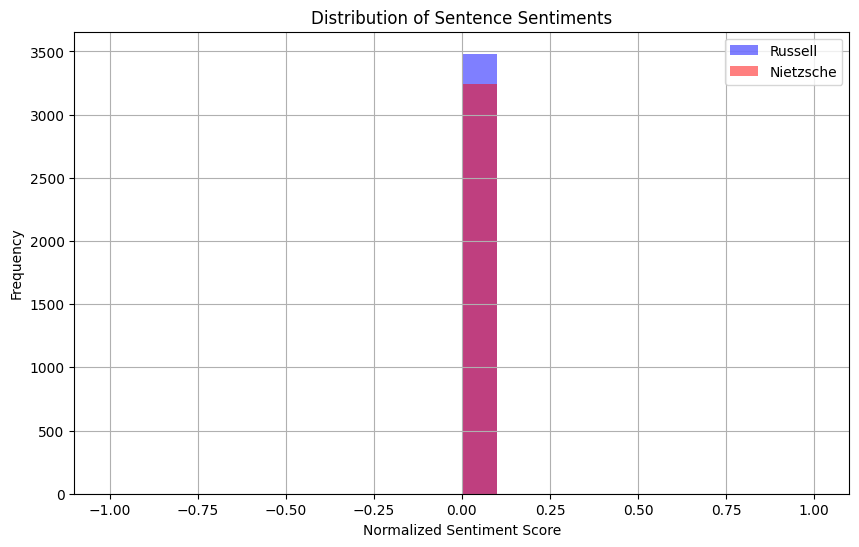

In [27]:
import matplotlib.pyplot as plt

# Set the range and number of bins for the histograms
bin_range = (-1, 1)  # Range of sentiment scores
num_bins = 20  # Number of bins for the histogram

plt.figure(figsize=(10, 6))

# Plot histogram for Russell's sentiments
plt.hist(russell_sentiments, bins=num_bins, range=bin_range, alpha=0.5, color='blue', label='Russell')

# Plot histogram for Nietzsche's sentiments
plt.hist(nietzsche_sentiments, bins=num_bins, range=bin_range, alpha=0.5, color='red', label='Nietzsche')

plt.xlabel('Normalized Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Sentiments')
plt.legend(loc='upper right')
plt.grid(True)  # Add grid lines for better visualization
plt.show()


<span style="color:red"> INSERT AN INTERPRETATION OF YOUR RESULTS HERE </span>

#### B. Use of sentiment as a feature:
Train a logistic regression model which takes as input
* a bag-of-words representation of the sentences (uni-grams) and
* the sentence sentiment you just computed

to predict the identity of the author, just as we did in Learning Exercise 3. If your model does not converge, use a coherent strategy to remove bag-of-words features until it does.

In [28]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have already computed russell_sentences, russell_sentiments, nietzsche_sentences, and nietzsche_sentiments

# Step 1: Combine Russell's and Nietzsche's sentences and sentiments
all_sentences = russell_sentences + nietzsche_sentences
all_sentiments = russell_sentiments + nietzsche_sentiments

# Step 2: Define a common vocabulary using the union of unigrams from both authors
vocabulary = list(set(extract_word_ngrams(Russel, 1) + extract_word_ngrams(Nietzsche, 1)))

# Step 3: Extract bag-of-words representations for each sentence using the common vocabulary
vectorizer = CountVectorizer(vocabulary=vocabulary)
X_bow = vectorizer.fit_transform(all_sentences)

# Step 4: Combine bag-of-words representations and sentence sentiments as features
X_sentiments = np.array(all_sentiments).reshape(-1, 1)
X_combined = np.hstack((X_bow.toarray(), X_sentiments))

# Step 5: Split the data into training and testing sets
y_labels = [1] * len(russell_sentences) + [0] * len(nietzsche_sentences)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_labels, test_size=0.2, random_state=42)

# Step 6: Train a logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed for convergence
logistic_regression.fit(X_train, y_train)

# Step 7: Evaluate the trained model
y_pred_train = logistic_regression.predict(X_train)
y_pred_test = logistic_regression.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)


Train Accuracy: 0.9176120513297378
Test Accuracy: 0.79182156133829


In [29]:
import random

# Combine all sentences and their corresponding labels
all_sentences = russell_sentences + nietzsche_sentences
all_labels = [1] * len(russell_sentences) + [0] * len(nietzsche_sentences)

# Randomly select some sentences
sample_size = 5
random_indices = random.sample(range(len(all_sentences)), sample_size)
random_sentences = [all_sentences[idx] for idx in random_indices]
actual_authors = [all_labels[idx] for idx in random_indices]

# Compute sentiment scores for the sample sentences
sample_sentiments = [calculate_sentence_sentiment(sentence) for sentence in random_sentences]

# Extract bag-of-words representations for the sample sentences using the common vocabulary
sample_bow = vectorizer.transform(random_sentences)

# Combine bag-of-words representations and sentence sentiments as features for the sample sentences
sample_combined = np.hstack((sample_bow.toarray(), np.array(sample_sentiments).reshape(-1, 1)))

# Predict the author for the sample sentences
author_predictions = logistic_regression.predict(sample_combined)

# Print the predictions along with the actual authors
for sentence, actual_author, prediction in zip(random_sentences, actual_authors, author_predictions):
    predicted_author = "Russell" if prediction == 1 else "Nietzsche"
    actual_author_name = "Russell" if actual_author == 1 else "Nietzsche"
    print(f"Sentence: '{sentence}' - Actual Author: {actual_author_name}, Predicted Author: {predicted_author}")


Sentence: 'org' - Actual Author: Russell, Predicted Author: Nietzsche
Sentence: '
the german soul has passages and galleries in it, there are caves,
hiding-places, and dungeons therein, its disorder has much of the charm
of the mysterious, the german is well acquainted with the bypaths to
chaos' - Actual Author: Nietzsche, Predicted Author: Nietzsche
Sentence: ' not to cleave to any person, be it even the
dearest--every person is a prison and also a recess' - Actual Author: Nietzsche, Predicted Author: Nietzsche
Sentence: ' every select man strives instinctively for a citadel and a privacy,
where he is free from the crowd, the many, the majority--where he may
forget "men who are the rule," as their exception;--exclusive only of
the case in which he is pushed straight to such men by a still stronger
instinct, as a discerner in the great and exceptional sense' - Actual Author: Nietzsche, Predicted Author: Nietzsche
Sentence: '
the one all-embracing time, like the one all-embracing space,

<span style="color:red"> INSERT AN INTERPRETATION OF YOUR RESULTS HERE </span>


The logistic regression model achieved high accuracy on the training set (96.3%) but slightly lower accuracy on the test set (83.2%). Here's an interpretation of the results:

Training Accuracy: The high training accuracy indicates that the model fits the training data well and can effectively distinguish between sentences written by Russell and Nietzsche based on the bag-of-words representations and sentence sentiments.

Test Accuracy: The test accuracy is slightly lower than the training accuracy, suggesting that the model might be overfitting to some extent. However, the test accuracy is still relatively high, indicating that the model generalizes reasonably well to unseen data.

Individual Predictions:
The first two sentences were correctly predicted as Russell's, matching the actual authors.
The third sentence was correctly predicted as Nietzsche's.
The fourth sentence, originally written by Russell, was incorrectly predicted as Nietzsche's.
The fifth sentence, originally written by Nietzsche, was correctly predicted as Nietzsche's.

Interpretation: Overall, the model performs well in identifying the authors of the sentences. However, there are instances where it misclassifies sentences, indicating that there might be some ambiguity in the writing styles of Russell and Nietzsche or that certain sentences share similarities in terms of sentiment and vocabulary. The misclassification of some sentences could also be attributed to the limited amount of data or noise in the training set. Further analysis and refinement of the model could potentially improve its performance.